In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
data=pd.read_excel("AgeScoSal.xlsx")
data

,Age,Score,Salary
0,21.0,100,39343
1,21.5,90,46205
2,21.7,70,37731
3,22.0,76,43525
4,22.2,88,39891
5,23.0,90,56642
6,23.0,39,60150
7,23.3,45,54445
8,23.3,60,64445
9,23.6,66,57189


In [5]:
data.isnull()

,Age,Score,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [6]:
data.describe()

,Age,Score,Salary
count,29.000000,29.000000,29.000000
mean,26.844828,71.172414,74421.310345
std,4.826385,20.320765,26469.970970
min,21.000000,39.000000,37731.000000
25%,23.300000,60.000000,56642.000000
50%,25.000000,70.000000,64445.000000
75%,30.000000,90.000000,98273.000000
max,37.000000,100.000000,122391.000000


In [7]:
data.dtypes

Age       float64
Score       int64
Salary      int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     29 non-null     float64
 1   Score   29 non-null     int64  
 2   Salary  29 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 824.0 bytes


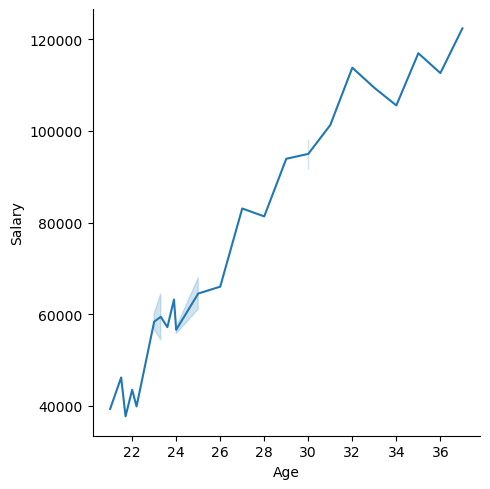

In [9]:
sns.relplot(x="Age",y="Salary",kind="line",data=data)

plt.show()

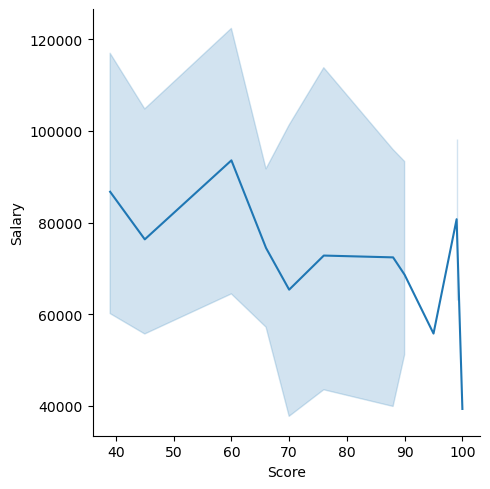

In [10]:
sns.relplot(x="Score",y="Salary",kind="line",data=data)
plt.show()

In [41]:
X=data[["Age","Score"]]

In [42]:
X

,Age,Score
0,21.0,100
1,21.5,90
2,21.7,70
3,22.0,76
4,22.2,88
5,23.0,90
6,23.0,39
7,23.3,45
8,23.3,60
9,23.6,66


In [43]:
Y=data["Salary"]

In [44]:
Y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
Name: Salary, dtype: int64

## LinearRegression

In [45]:
model=LinearRegression()

In [36]:
model.fit(data[["Age","Score"]], data.Salary)

LinearRegression()

In [46]:
model.fit(X,Y)

LinearRegression()

In [47]:
print(model.coef_)
print(model.intercept_)

[5323.1326435   -23.85985043]
-66779.10454075526


In [48]:
model.predict([[21,100]])   

array([42620.69592993])

In [49]:
model.predict([[21.5,90]]) 

array([45520.86075597])

In [50]:
model.predict([[37,60]])

array([128745.21224311])

## it will split data in 2 part ....train and test ...

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 2)
(9, 2)
(20,)
(9,)


In [54]:
model.fit(X_train,Y_train)

LinearRegression()

In [55]:
y_pred=model.predict(X_test)

In [56]:
y_pred

array([ 59800.80742107,  48191.83216337,  44082.08067034,  56888.70437322,
       133927.00659878,  61825.05740141,  84383.98022774, 129501.8258804 ,
       109100.92379447])

In [57]:
new_df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred,'diff':Y_test-y_pred})

In [58]:
new_df

,Actual,Predicted,diff
13,57081,59800.807421,-2719.807421
4,39891,48191.832163,-8300.832163
1,46205,44082.080670,2122.919330
10,63218,56888.704373,6329.295627
28,122391,133927.006599,-11536.006599
12,56957,61825.057401,-4868.057401
18,81363,84383.980228,-3020.980228
27,112635,129501.825880,-16866.825880
24,109431,109100.923794,330.076206


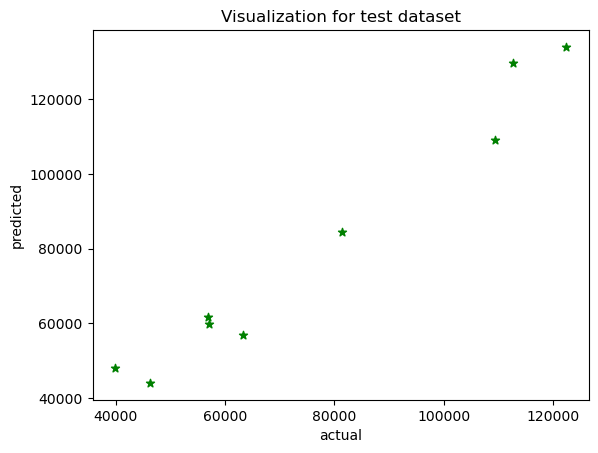

In [60]:
plt.scatter(Y_test,y_pred,color="green",marker="*")
#plt.plot(Y_test,y_pred,color="red")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Visualization for test dataset")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
import math

In [31]:
mean_squared_error(Y_test, y_pred)

63485606.094652995

## r2_score

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Y_test, y_pred)*100

92.59231808488637

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(Y_test, y_pred)

6232.7556505269395